<a href="https://colab.research.google.com/github/Rao7079/codsoft_CREDIT-CARD-FRAUD-DETECTION/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#ataset_path='/kaggle/input/fraud-detection/fraudTrain.csv'
fraud_data = pd.read_csv('/content/fraudTrain[1].csv')

In [12]:
print(fraud_data.info())
print(fraud_data.describe())

print(fraud_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15593 non-null  int64  
 1   trans_date_trans_time  15593 non-null  object 
 2   cc_num                 15593 non-null  int64  
 3   merchant               15593 non-null  object 
 4   category               15593 non-null  object 
 5   amt                    15593 non-null  float64
 6   first                  15593 non-null  object 
 7   last                   15593 non-null  object 
 8   gender                 15593 non-null  object 
 9   street                 15593 non-null  object 
 10  city                   15593 non-null  object 
 11  state                  15593 non-null  object 
 12  zip                    15593 non-null  int64  
 13  lat                    15593 non-null  float64
 14  long                   15593 non-null  float64
 15  ci

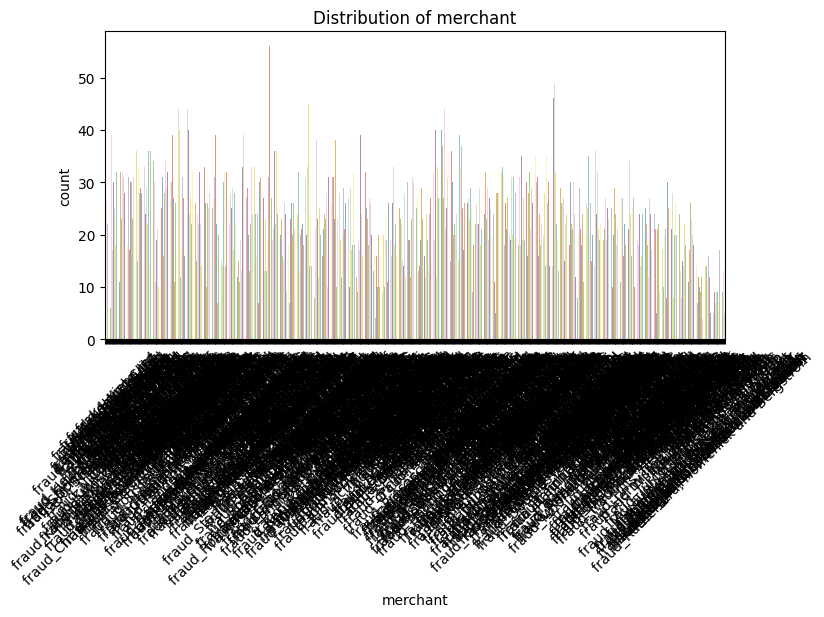

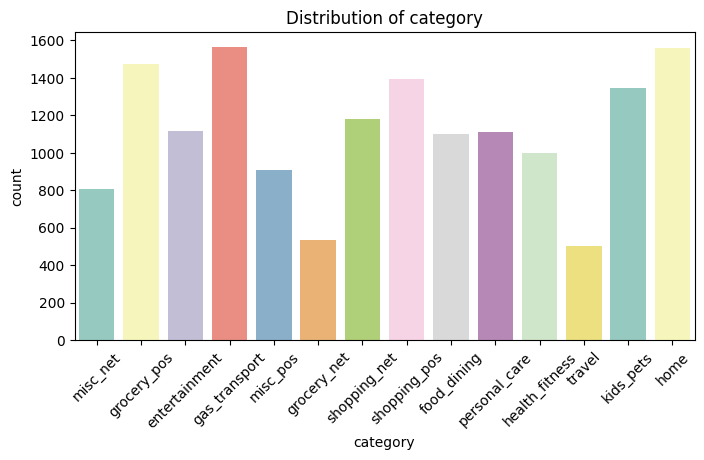

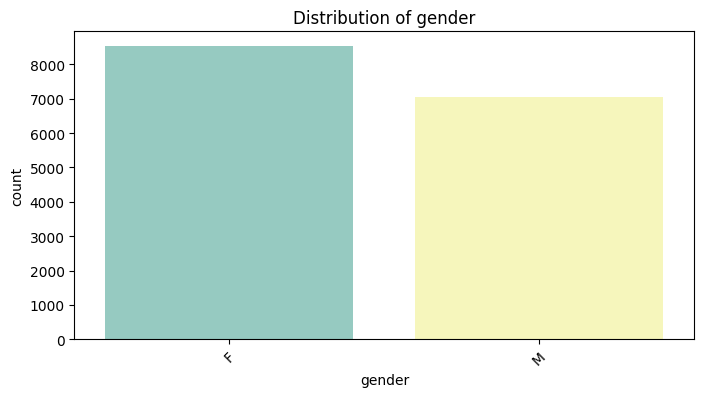

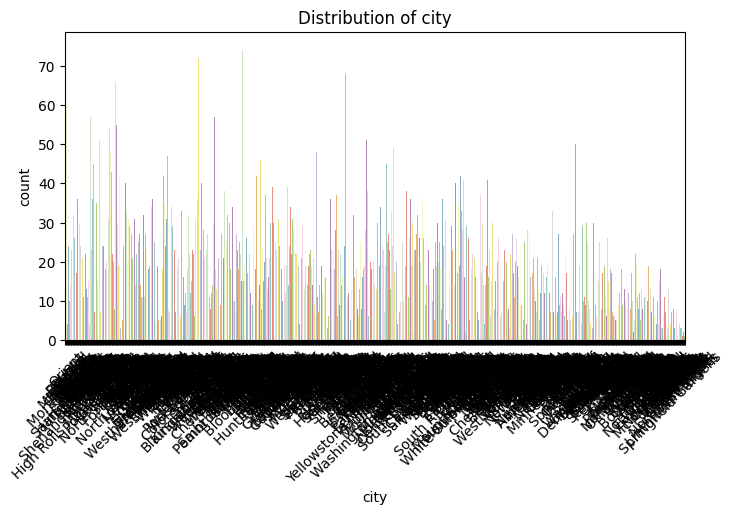

In [13]:
import seaborn as sns


# Explore categorical variables
categorical_columns = ['merchant', 'category', 'gender','city']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=fraud_data, x=column, palette='Set3')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


In [14]:
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])


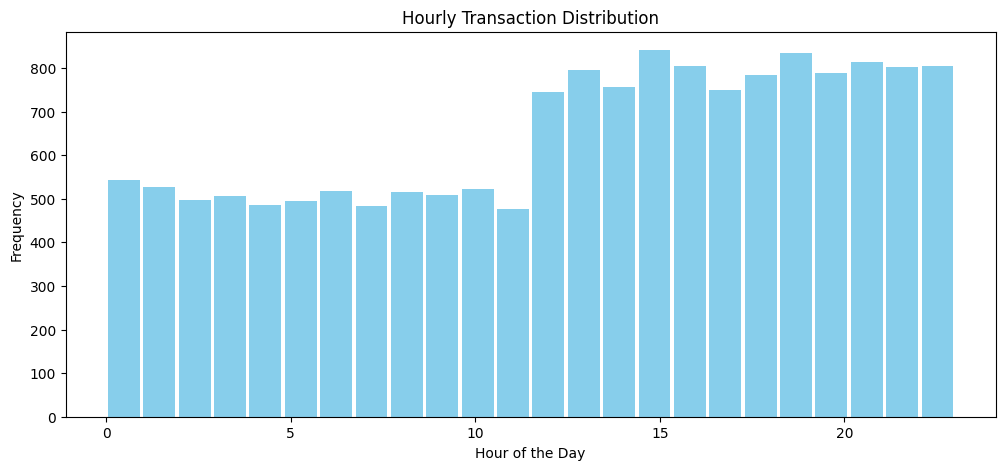

In [15]:
# Time-based analysis
plt.figure(figsize=(12, 5))
fraud_data['trans_date_trans_time'].dt.hour.plot(kind='hist', bins=24, rwidth=0.9, color='skyblue')
plt.title('Hourly Transaction Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

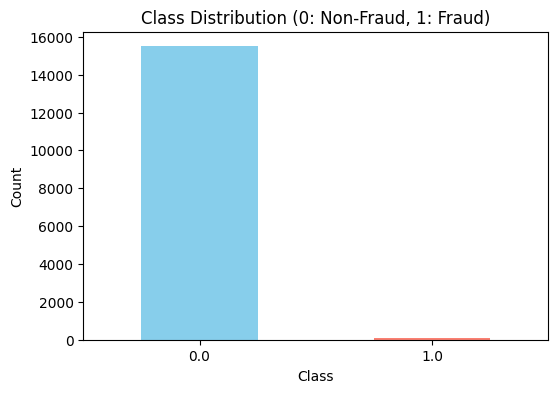

In [16]:
plt.figure(figsize=(6, 4))
fraud_data['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

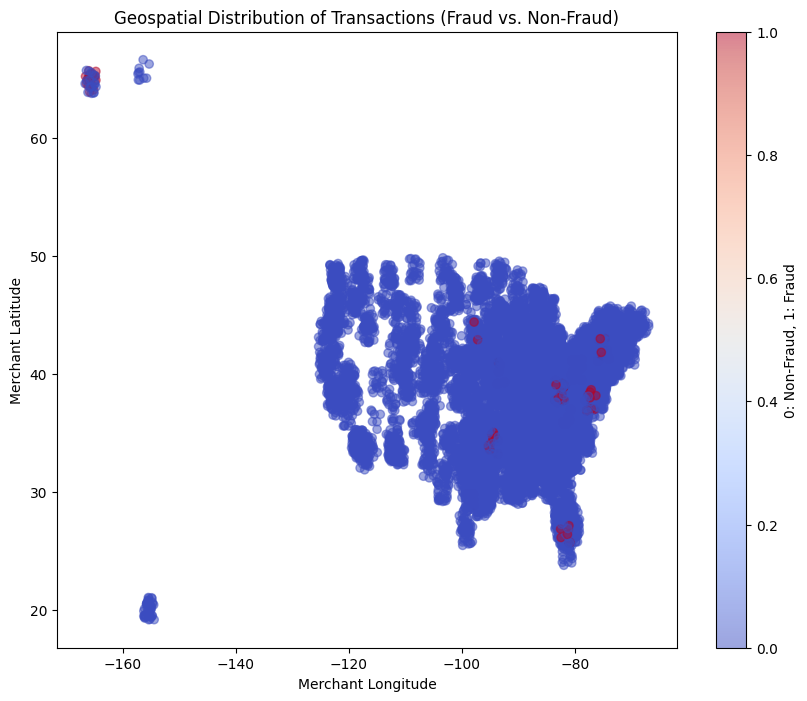

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(fraud_data['merch_long'], fraud_data['merch_lat'], c=fraud_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geospatial Distribution of Transactions (Fraud vs. Non-Fraud)')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.colorbar(label='0: Non-Fraud, 1: Fraud')
plt.show()

In [18]:
fraud_data['amt_decimal'] = fraud_data['amt'] % 1

fraud_data['trans_date_trans_time'] = fraud_data['trans_date_trans_time'].astype(str)

fraud_data['transaction_date'] = pd.to_datetime(fraud_data['trans_date_trans_time'].str.split(' ').str[0])
fraud_data['cardholder_age'] = (fraud_data['transaction_date'] - pd.to_datetime(fraud_data['dob'])).dt.days // 36
fraud_data['amt_to_city_pop_ratio'] = fraud_data['amt'] / fraud_data['city_pop']


print(fraud_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.97             312               0.001422
1         0.23             411               0.719664
2         0.11             577               0.052987
3         0.00             527               0.023208
4         0.96             332               0.423838


In [19]:
columns_to_drop = [
    'Unnamed: 0',        # An index or identifier
    'cc_num',            # Masked credit card numbers
    'trans_date_trans_time',  #We have unix_time
    'transaction_date',  # Same as unix_time
    'first',             # First name
    'last',              # Last name
    'street',            # Street address
    'city',              # City (state information is more relevant)
    'state',             # State (zip code and lat/long provide location info)
    'zip',               # Zip code (redundant with lat/long)
    'dob',               # Date of birth (we've calculated cardholder_age)
    'trans_num',         # Transaction number or identifier
]

In [20]:
fraud_data = fraud_data.drop(columns=columns_to_drop)

# Display the updated dataset
print(fraud_data.head())

                             merchant       category     amt gender      lat  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F  36.0788   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F  48.8878   
2                fraud_Lind-Buckridge  entertainment  220.11      M  42.1808   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M  46.2306   
4                 fraud_Keeling-Crist       misc_pos   41.96      M  38.4207   

       long  city_pop                                job   unix_time  \
0  -81.1781      3495          Psychologist, counselling  1325376018   
1 -118.2105       149  Special educational needs teacher  1325376044   
2 -112.2620      4154        Nature conservation officer  1325376051   
3 -112.1138      1939                    Patent attorney  1325376076   
4  -79.4629        99     Dance movement psychotherapist  1325376186   

   merch_lat  merch_long  is_fraud  amt_decimal  cardholder_age  \
0  36.011293  -82.0

In [22]:
testing_data = pd.read_csv('/content/fraudTest[1].csv')


In [23]:
testing_data = testing_data.dropna()

In [24]:
testing_data['amt_decimal'] = testing_data['amt'] % 1

In [25]:
testing_data['trans_date_trans_time'] = testing_data['trans_date_trans_time'].astype(str)


In [27]:
testing_data['transaction_date'] = pd.to_datetime(testing_data['trans_date_trans_time'].str.split(' ').str[0])
testing_data['cardholder_age'] = (testing_data['transaction_date'] - pd.to_datetime(testing_data['dob'])).dt.days // 365

testing_data['amt_to_city_pop_ratio'] = testing_data['amt'] / testing_data['city_pop']

print(testing_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.86              52               0.000009
1         0.84              30               0.098808
2         0.28              49               0.001197
3         0.05              32               0.001096
4         0.19              65               0.002833


In [28]:
testing_data = testing_data.drop(columns=columns_to_drop)

In [29]:
fraud_data = fraud_data.dropna()


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'merchant', 'category', 'job']
for col in categorical_columns:
    fraud_data[col] = label_encoder.fit_transform(fraud_data[col])
    testing_data[col] = label_encoder.fit_transform(testing_data[col])

In [31]:
from sklearn.preprocessing import StandardScaler

X_train = fraud_data.drop(columns=['is_fraud'])
y_train = fraud_data['is_fraud']

In [32]:
X_val = testing_data.drop(columns=['is_fraud'])
y_val = testing_data['is_fraud']

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print or store the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9965065502183406
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
